# CS 5683 - Big Data Analytics
## Assignment - 6: Graphs

In [1]:
# Yonghwan Kim A11746276
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections

### Assignment Total: 15 points (3% of final)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Use the network (edge list) 'Wiki-Vote.txt' given in Canvas

In [3]:
# NOTE: The data is given as an edgelist
# Meaning: each edge (node1,node2) in one line of the input file
input_data = '/content/drive/MyDrive/Wiki-Vote.txt'

In [4]:
# Load the data as a directed graph (1 Point)
# Note-1: networkx read_edgelist will read the graph as undirected graph
# Note-2: you can convert this directed graph to an undirected graph wherever necessary in this assignment

graph = nx.read_edgelist(input_data,create_using=nx.DiGraph) # directed graph
undirG = nx.Graph(graph) # undirected graph
print(f'graph is directed? {nx.is_directed(graph)}')
print(f'undirG is directed? {nx.is_directed(undirG)}')

graph is directed? True
undirG is directed? False


##### Print the following basic properties of the given graph

In [5]:
# Print the number of nodes and edges in the graph here (2 Points)
print(graph) # Directed
print(undirG) # Undirected
print()
print(f'graph: nodes {len(graph.nodes)} edges {len(graph.edges)}') # Directed
print(f'undirG: nodes {len(undirG.nodes)} edges {len(undirG.edges)}') # Undirected

DiGraph with 7115 nodes and 103689 edges
Graph with 7115 nodes and 100762 edges

graph: nodes 7115 edges 103689
undirG: nodes 7115 edges 100762


In [6]:
# Print the number of connected components here (1 Point)
# NOTE: There is a networkx package for this
print(nx.number_connected_components(undirG)) # the number of connected components

24


In [7]:
# Print the number of nodes in each component here(1 Point)
set_cc = nx.connected_components(undirG) # find connected components
components = 1
for c in set_cc:
    print(f'Component {components}: {len(c)}')
    components = components + 1

Component 1: 7066
Component 2: 2
Component 3: 2
Component 4: 2
Component 5: 2
Component 6: 2
Component 7: 2
Component 8: 2
Component 9: 2
Component 10: 2
Component 11: 2
Component 12: 2
Component 13: 2
Component 14: 2
Component 15: 2
Component 16: 3
Component 17: 2
Component 18: 2
Component 19: 3
Component 20: 2
Component 21: 2
Component 22: 2
Component 23: 2
Component 24: 3


In [8]:
# Delete all nodes from components which have less than 10 nodes in the graph here (1 Point)
print('Before Deletion', graph)
conn_comp = list(nx.connected_components(undirG))
for c in conn_comp:
    if len(c) < 10: # from components that have nodes lesser than 10
        for node in c:
            graph.remove_node(node) # remove node
print('After Deletion', graph)

Before Deletion DiGraph with 7115 nodes and 103689 edges
After Deletion DiGraph with 7066 nodes and 103663 edges


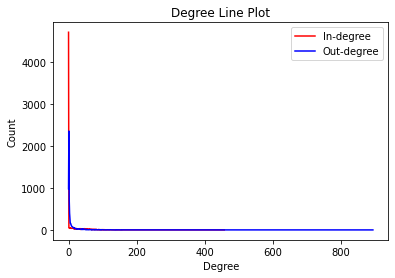

In [9]:
# Plot the degree distribution of the graph with a line graph here (5 Points)
# NOTE: You have to plot both in-degree and out-degree distribution in the same plot
# REFERENCE: https://networkx.org/documentation/networkx-2.3/auto_examples/drawing/plot_degree_histogram.html
# You have to get both in_degree and out_degree
# You have to use line plot instead of a histogram

indegree_sequence = sorted([d for n, d in graph.in_degree()], reverse=True)  # in degree sequence
outdegree_sequence = sorted([d for n, d in graph.out_degree()], reverse=True)  # out degree sequence

indegreeCount = collections.Counter(indegree_sequence) # in degree counter
outdegreeCount = collections.Counter(outdegree_sequence) # out degree counter
ideg, icnt = zip(*indegreeCount.items())
odeg, ocnt = zip(*outdegreeCount.items())

plt.plot(ideg, icnt, color='r')
plt.plot(odeg, ocnt, color='b')
plt.title("Degree Line Plot")
plt.legend(["In-degree","Out-degree"])
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()

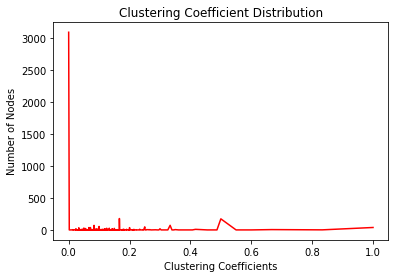

In [10]:
# Similar to the degree distribution, plot the clustering coefficient distribution of the graph 
#        with a line graph here (5 Points)
# NOTE: You can get the clustering coefficient of each node using the networkX function given below:
# REFERENCE: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html
# HOW TO PLOT THIS?
# STEP-1: Get clustering coefficient of each node
# STEP-2: Count the number of nodes with each clustering coefficient value
# STEP-3: Plot with clustering coefficient in x-axis and number of nodes in y-axis
# We do not need plot with clustering coefficient of both in_degree and out_degree
# Use line plot instead of histogram
clust_coef = nx.clustering(graph) # find clustering coeffcient
clustDict = dict()
# Count the number of nodes for each clustering coefficient value
for k, v in clust_coef.items():
    if v not in clustDict:
        clustDict[v] = 1
    else:
        clustDict[v] = clustDict[v] + 1
# sort the dictionary by coefficient value
sorted_clustDict = sorted(clustDict.items(), key = lambda kv: kv[0])

cl, cnt = zip(*sorted_clustDict)

plt.plot(cl, cnt, color='r')
plt.title("Clustering Coefficient Distribution")
plt.ylabel("Number of Nodes")
plt.xlabel("Clustering Coefficients")

plt.show()

In [11]:
# TIPS FOR YOUR PLOTS:
# Your plots must have the following
# x-axis name
# y-axis name
# plot title
# Legend, if there are multiple plots in a same plot